In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

survival = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

Take a look at the data and its types

In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


View the statistics

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


How many survived?

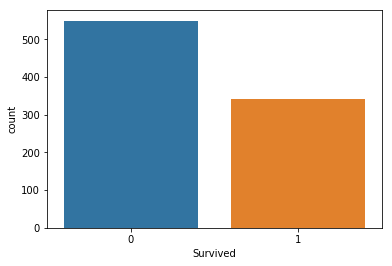

In [4]:
sns.countplot("Survived", data=train)
plt.show()

Women and children were allowed to escape first, so we expect that women will have higher survival rate.

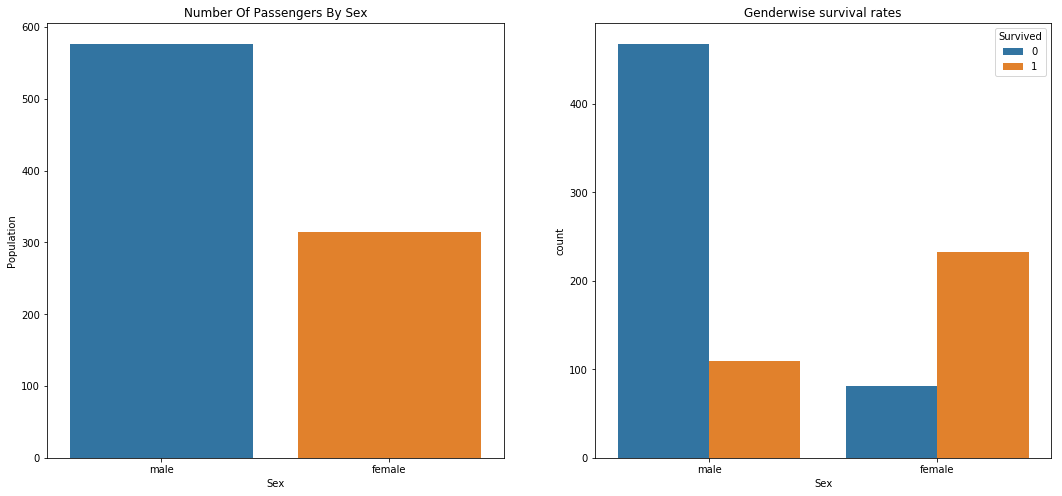

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
#train["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
sns.countplot("Sex", data = train, ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("Sex", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Genderwise survival rates")
plt.show()

/home/rahul/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rahul/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


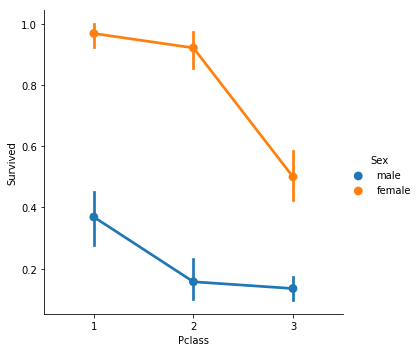

In [6]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = train)

/home/rahul/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


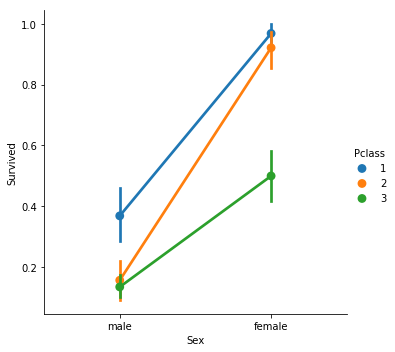

In [7]:
sns.factorplot("Sex", "Survived", hue = "Pclass", data = train)

How many people of each passenger class, and who had the highest chance of survival?

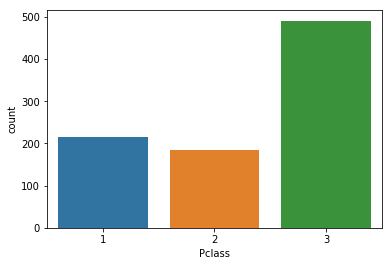

In [8]:
sns.countplot("Pclass", data=train)

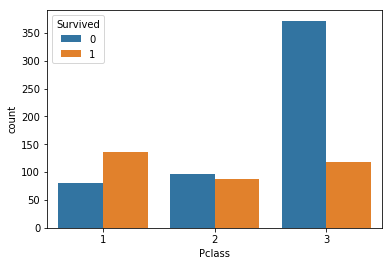

In [9]:
sns.countplot("Pclass", hue= "Survived",data=train)
#Classwise survival rates

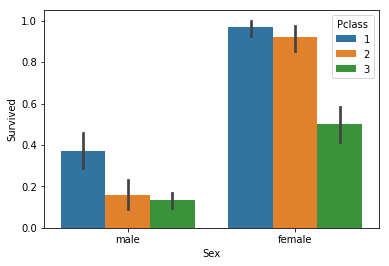

In [10]:
sns.barplot("Sex","Survived",hue="Pclass",data=train)

Compare the survival rates by Passenger Class and Genders numerically.

In [11]:
#pd.crosstab([train["Pclass"],train["Survived"]],train["Sex"],margins=True).style.background_gradient(cmap="summer_r")
pd.crosstab([train["Pclass"],train["Survived"]],train["Sex"],margins=True).style.background_gradient(cmap="summer_r")

Compare the survival rates by Embarkation location and Genders numerically.

In [12]:
pd.crosstab([train["Embarked"],train["Survived"]],train["Sex"],margins=True).style.background_gradient(cmap = "summer_r")

In [13]:
pd.crosstab([train["Embarked"],train["Survived"]],train["Pclass"],margins=True).style.background_gradient(cmap="summer_r")

We can deduce some interesting findings from these embarkation wise numbers. The higher death rate of people who embarked at Southhampton can be attributed to the British cultural qualities of being polite in general, their 'standing in line' to wait for their turn. People from other countries were more individualistic, and this may have contributed to their comparatively higher survival rates.

Get their titles by string splitting:

In [14]:
def get_title(data_frame):
    # Get names from data frame
    name_data = data_frame["Name"]
    
    # Obtain titles
    data_frame["Title"] = [name.split(", ", 1)[1].split(".", 1)[0] for name in name_data]
    
    # Find all titles
    titles = []
    for title in data_frame["Title"]:
        if title not in titles:
            titles.append(title)        
    
    return data_frame, titles

train, titles = get_title(train)
print(titles)


['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [15]:
pd.crosstab(train["Title"],train["Sex"]).T.style.background_gradient(cmap="summer_r")

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [16]:
def title2int(data):
    data["Title"].replace(["Major", "Capt", "Sir", "Dr", "Don", "Mlle", "Mme", "Ms", "Dona", "Lady", "the Countess", "Jonkheer", "Col", "Rev"],
                           ["Mr", "Mr", "Mr", "Mr", "Mr", "Miss", "Miss", "Miss", "Mrs", "Mrs", "Mrs", "Other", "Other", "Other"], inplace = True)
    data["Title"].replace(["Mr", "Miss", "Mrs", "Master", "Other"], [0, 1, 2, 3, 4], inplace = True)
    return data

train = title2int(train)

In [17]:
train.groupby("Title")["Age"].mean()

Title
0    32.739609
1    21.860000
2    35.981818
3     4.574167
4    45.888889
Name: Age, dtype: float64

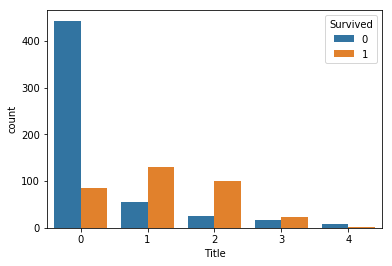

In [18]:
sns.countplot("Title",hue="Survived",data=train)

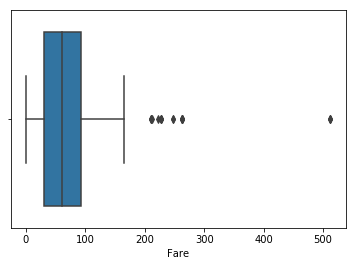

In [19]:
sns.boxplot(train[train["Pclass"]==1]["Fare"], data=train)

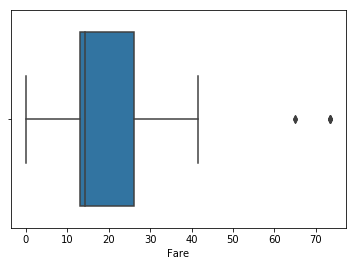

In [20]:
sns.boxplot(train[train["Pclass"]==2]["Fare"], data=train)

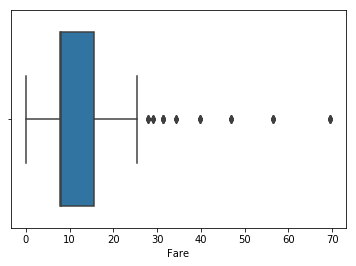

In [21]:
sns.boxplot(train[train["Pclass"]==3]["Fare"], data=train)

In [22]:
train.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [23]:
train.groupby("Pclass")["Fare"].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [24]:
def faregroup(data):
    data["Fare_group"]="NaN"
    data.loc[data["Fare"]<65,"Fare_group"]=2
    data.loc[data["Fare"]>=65,"Fare_group"]=1    
    return data

train=faregroup(train)
    

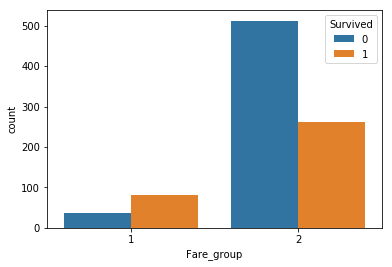

In [25]:
sns.countplot("Fare_group", hue = "Survived", data = train)
plt.show()

In [26]:
train["Embarked"].replace(["S", "Q", "C"], [1, 2, 3], inplace = True)

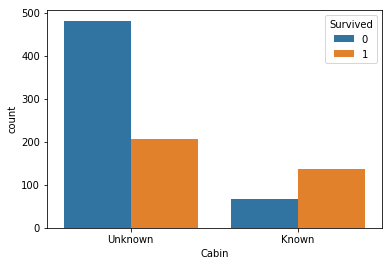

In [27]:
def Cabin_type(data):
    data.loc[data["Cabin"].notnull(), "Cabin"] = "Known"
    data.loc[data["Cabin"].isnull(), "Cabin"] = "Unknown"
    return data

train = Cabin_type(train)
sns.countplot("Cabin", hue = "Survived", data = train)
plt.show()

In [28]:
def cab2int(data):
    data.loc[data["Cabin"] == "Known", 'Cabin'] = 2
    data.loc[data["Cabin"] == "Unknown", 'Cabin'] = 1
    return data

train = cab2int(train)

In [29]:
train["Sex"].replace(["male","female"],[1,2],inplace=True)

In [31]:
train.groupby("Title")["Age"].mean()

Title
0    32.739609
1    21.860000
2    35.981818
3     4.574167
4    45.888889
Name: Age, dtype: float64

We hypothesize that young children will be given more consideration, and on the whole, will have higher survival rates than their adult counterparts.

New feature - age groups

In [35]:
def agegroup(data):
    data["Age_group"]="NaN"
    data.loc[data["Age"]<10,"Age_group"]=1 #young kids
    data.loc[(data["Age"]>=13)&(data["Age"]<20),"Age_group"]=2 #teens and young adults
    data.loc[(data["Age"]>=20)&(data["Age"]<32),"Age_group"]=3 #adults
    data.loc[(data["Age"]>=32)&(data["Age"]<48),"Age_group"]=4 #middle aged
    data.loc[(data["Age"]>=48)&(data["Age"]<65),"Age_group"]=5 #initial elderly
    data.loc[(data["Age"]>=65),"Age_group"]=6 #elderly
    return data

train=agegroup(train)    

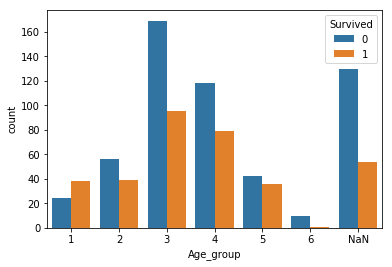

In [36]:
sns.countplot("Age_group", hue = "Survived", data = train)
plt.show()

Our hypothesis was correct, but we also notice a large number of NaN values for age, we must calculate them, preferably with predicted values using Random Forest Regression.

New feature - Group them as being child or non child.

In [33]:
def childgroup(data):
    data["Child"] = "NaN"
    data.loc[data["Age"] <= 18, "Child"] = 0 # Child
    data.loc[data["Age"] > 18, "Child"] = 1 # Adult
    return data

train = childgroup(train)

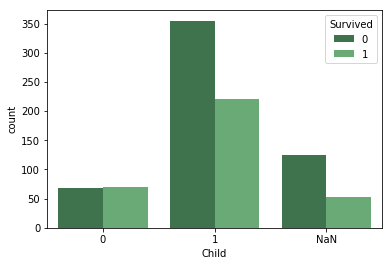

In [34]:
sns.countplot("Child", hue = "Survived", data = train, palette = "Greens_d")
plt.show()

In [37]:
train["FamSize"] = train["SibSp"] + train["Parch"] + 1

New feature - Group them as having family, and no family. We may think that having families is a burden, and causes a lower survival rate, as people may want to rescue their family members as well, which is more difficult than escaping alone. However another way of approaching this would be to consider - wouldnt family members favour their own to climb onto the safety boats, leading to higher survival? Let us visualise this to find out.

In [38]:
def family(data):
    data["Fam_group"] = "NaN"
    data.loc[data["FamSize"] == 1, "Fam_group"] = 0 # Single
    data.loc[data["FamSize"] > 1, "Fam_group"] = 1 # Family
    return data

train = family(train)

Visualise survival of people w/o families.

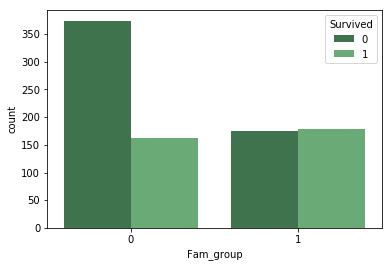

In [39]:
sns.countplot("Fam_group", hue = "Survived", data = train, palette = "Greens_d")
plt.show()

Turns out people with no family members have higher death rates than people with family members.